# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Gradient descent
Week 3 | Lesson 5.1




### LEARNING OBJECTIVES
*After this lesson, you will be able to:*

- Describe the intuition behind gradient descent.
- Recognize the use cases for gradient descent.
- Explain when a gradient descent algorithm can get "stuck".

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 10 min  | [Demo](#demo)  | Gradient descent |
| 10 min  | [Demo](#demo)  | Derivatives |
| 20 min  | [Demo](#ind-practice)  | Least squares loss and partial derivatives  |
| 30 min  | [Demo / Guided Practice](#demo)  | Coding the gradient descent  |
| 10 min  | [Demo / Guided Practice](#ind-practice)  |  When gradient descent fails |
| 5 min  | [Conclusion](#conclusion)  | |



# Gradient descent

Gradient descent is in essence an algorithm designed to minimize functions. 

> Check: what kinds of functions do we often want to minimize?

Gradient descent is popular in machine learning and statistics for minimizing loss functions such as least squares.

The gradient descent algorithim uses the derivative of the loss function to move in the direction where the loss function is "descending".

## 1. Derivatives

The derivative of a function measures the **rate of change** of the values of the function with respect to another quantity. 

We are not going to cover the calculus of derivatives today, but will give examples through explaining their use in gradient descent.

Imagine the derivative as a tangent line on the edge of another function. For example, in the image below, if the black curve was the velocity of a car, the red tangent would represent the derivative of velocity at that point, which is the acceleration of the car.

![derivative](https://camo.githubusercontent.com/2f70b084174b825e3ad88564301f9aaf46997fd3/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30662f54616e67656e745f746f5f615f63757276652e737667)



A derivative of a function indicates whether the function is **increasing or decreasing** based on the value of the derivative. 

* If the function is not changing (the tangent line is flat), **the derivative is 0**
* If the function is increasing (the tangent slope is positive), **the derivative is positive**
* If the function is decreasing (the tangent slope is negative), **the derivative is negative**

## 2. The least squares loss and regression

Recall the least squares loss from yesterday:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - \hat{y}_i\right)^2}$$

As well as the formula for a linear regression with a single predictor variable:

### $$y = \beta_0 + \beta_1x_1$$

We can redefine the loss function, inserting the regression formula:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - (\beta_0 + \beta_1x_i)\right)^2}$$

## 3. Partial derivatives of the loss functions

We are going to calculate the two **partial derivatives** of the loss function. Partial derivatives are derivatives with respect to one variable while keeping the other variables constant. Our partial derivatives will be:

* The derivative of the loss function with respect to $\beta_0$ (the intercept)
* The derivative of the loss function with respect to $\beta_1$ (the slope/coefficient for $x_1$)



### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - (\beta_0 + \beta_1x_i)\right)^2}$$

The error function is defined by these two parameters: each new value of the error function depends on the changes in  $\beta_0$ and  $\beta_1$. 

What about x and y? Those variables affect the calculation of the loss, but they are not changing here -- they're what we fit our model to as we try to find the best parameters.

**The partial derivative with respect to $\beta_0$:**

### $$\frac{\delta}{\delta\beta_0} = \frac{2}{N}\sum_{i=1}^N{-\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$

**The partial derivative with respect to $\beta_1$:**

### $$\frac{\delta}{\delta\beta_1} = \frac{2}{N}\sum_{i=1}^N{-x_i\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$

So what are we going to do with these partial derivatives?


Together, these partial derivatives form a **vector** (visually speaking, a line pointing in some direction):

$$\langle \frac{\delta}{\delta\beta_0}, \frac{\delta}{\delta\beta_1} \rangle$$

This vector points in the **direction of the greatest increase of our loss function**.



If we move in the **opposite direction**, by subtracting a fraction of the partial derivative of $\beta_1$ from $\beta_1$, and subtracting a fraction of the partial derivative of $\beta_0$ from $\beta_0$, we will modify $\beta_1$ and $\beta_0$ such that the value of the error function shrinks!

We can repeat this incremental process until we reach the minimum of the function.

This is called gradient descent because **we are iteratively moving down the gradient of the error function to its minimum.**
![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)

## FAQ:

#### Q: How do we *actually* use this?
A: *You* don't, but some of the machine learning algorithms you use will. The gradient descent algorithm uses specific "step sizes", which you may need to choose manually.

#### Q: So do I need to be able to implement this in Python?
A: No. But you want to understand the intuition, and know when gradient descent can take too long to run, or straight-up *fail*. Very occasionally this will cause problems for you and you need to recognize the cause.

#### Q: Why are we learning this now?
A: Broadly speaking, so you can recognize the role optimization algorithms play in your work.

## 4. Coding the gradient descent algorithm

For the sake of illustration, let's code the gradient descent algorithm to find the optimal intercept and slope for a least squares linear regression model with one predictor.



In [2]:
#Load some packages

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### The mean squared error loss function

This function calculates the mean of the squared errors and will serve as our evaluator of the performance of our model:

In [3]:
def mean_squared_error(y_true, x, beta0, beta1):
    y_pred = beta0 + x * beta1
    mean_sq_err = np.mean((y_true - y_pred)**2)
    return mean_sq_err

### Gradient update function

This will update the values beta0 and beta1 using the partial derivatives and a step size to move along the gradient towards the minimum.

In [4]:
def gradient_update(y, x, beta0, beta1, step_size):
    
    beta0_gradient = 0
    beta1_gradient = 0
    
    N = float(len(y))
    
    ## Calculate the gradient of the loss function by summing the gradient of each component of that loss function
    for i in range(len(y)):
        
        # add to the beta0 gradient for each x,y using the partial derivative with respect to beta0
        beta0_gradient += (2./N * -1 * (y[i] - (beta0 + beta1*x[i])))
        
        # add to the beta1 gradient for each x,y using the partial derivative with respect to beta1
        beta1_gradient += (2./N * -1 * x[i] * (y[i] - (beta0 + beta1*x[i])))
        
    # update beta0 and beta1:
    beta0 = beta0 - (step_size * beta0_gradient)
    beta1 = beta1 - (step_size * beta1_gradient)
    
    return [beta0, beta1]

### Gradient descent iteration function

The last function will iterate multiple times, calling the gradient update function to incrementally change beta0 and beta1

In [5]:
def gradient_descent_iterator(y, x, beta0, beta1, step_size=.0001, iterations=500):
    
    mean_squared_errors = []
    mean_squared_errors.append(mean_squared_error(y, x, beta0, beta1))
    
    beta0s = [beta0]
    beta1s = [beta1]
    
    for i in range(iterations):
        [beta0, beta1] = gradient_update(y, x, beta0, beta1, step_size)
        mean_squared_errors.append(mean_squared_error(y, x, beta0, beta1))
        beta0s.append(beta0)
        beta1s.append(beta1)
        
    return [mean_squared_errors, beta0s, beta1s]

## 5. Run gradient descent on regression data

First let's make some x and y variables like we did earlier this week.

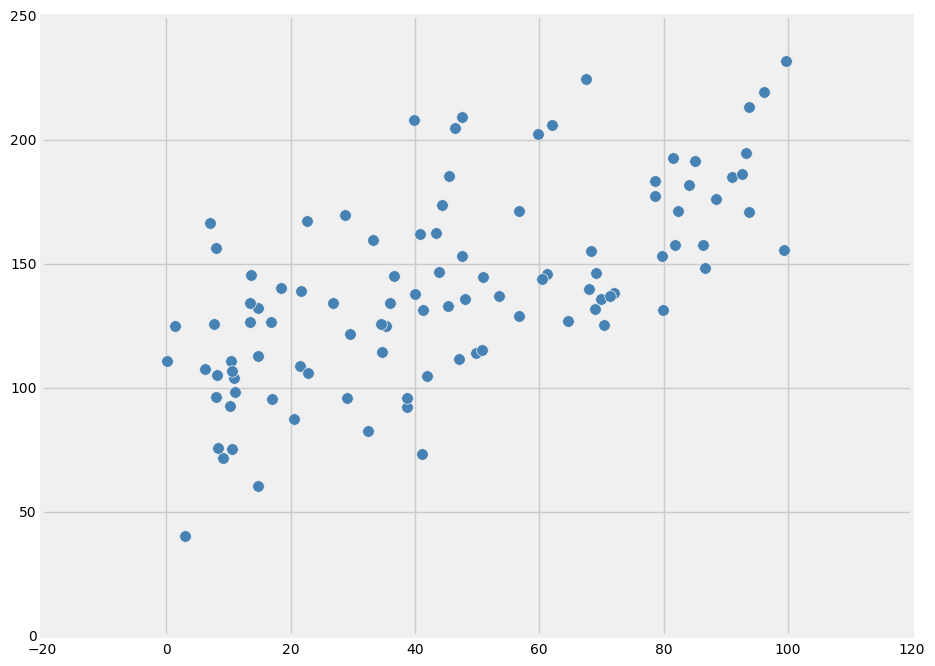

In [6]:
x = np.random.random_sample(100)*100
y = x + np.random.normal(np.random.normal(0,15), 30, size=100) + 100

plt.figure(figsize=(10,8))

plt.scatter(x, y, s=70, c='steelblue')

plt.show()

Then run the gradient descent algorithm, starting $\beta_1$ and $\beta_0$ both at 0.

In [7]:
[mses, beta0s, beta1s] = gradient_descent_iterator(y, x, 0, 0)

## 6. Plot the iterations of errors and betas

You can see that with each iteration the mean squared error iteratively decreases:

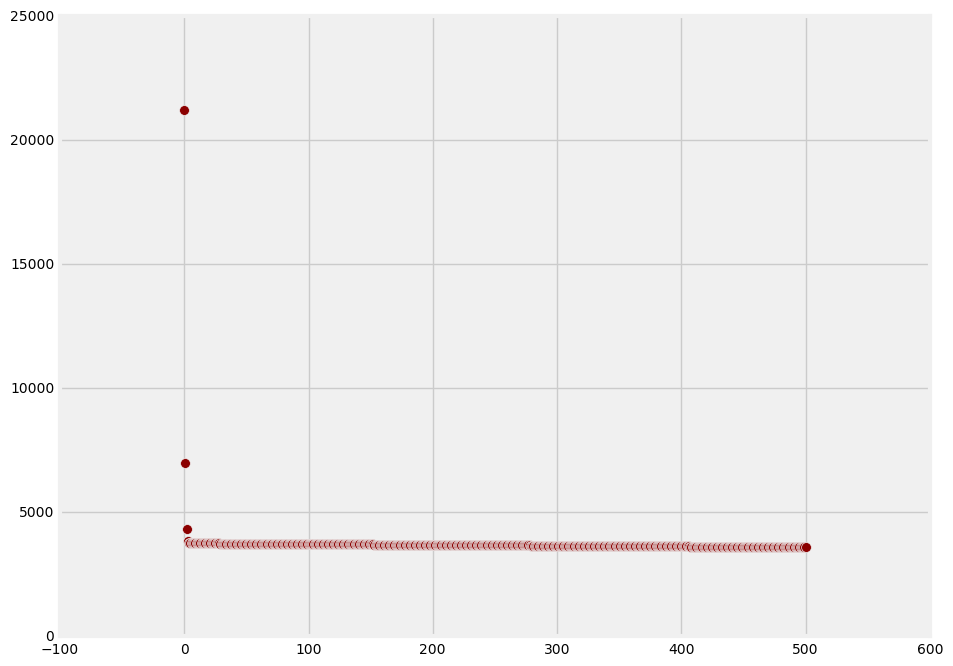

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(range(len(mses)), mses, s=50, c='darkred')
#plt.scatter(range(5), mses[0:5], s=50, c='darkred')
plt.show()

We can also plot the path of the $\beta_0$s and $\beta_1$s:

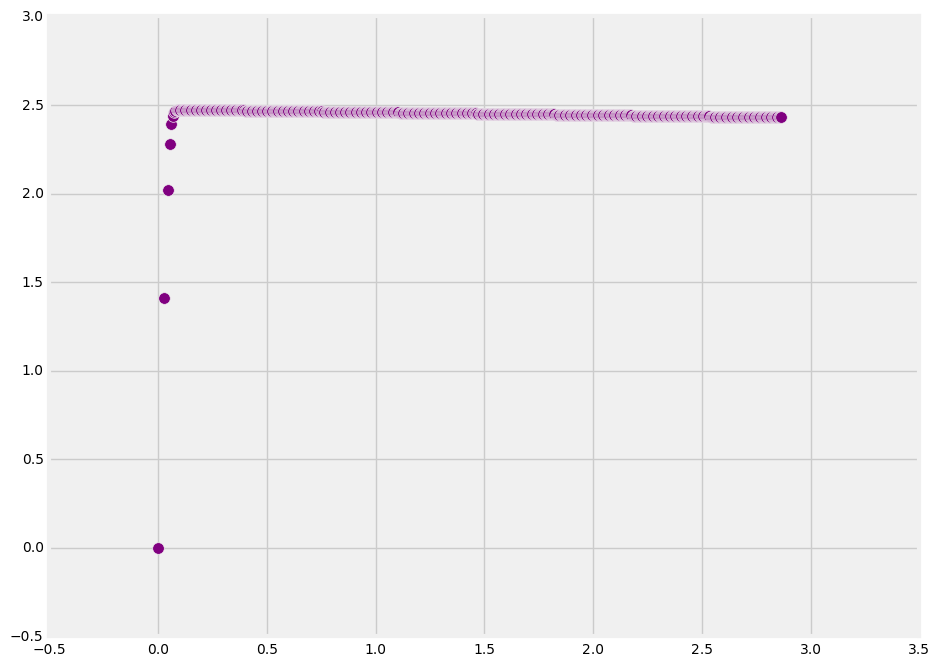

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(beta0s, beta1s, s=70, c='purple')
plt.show()

And the regression lines at different points in the gradient descent process:

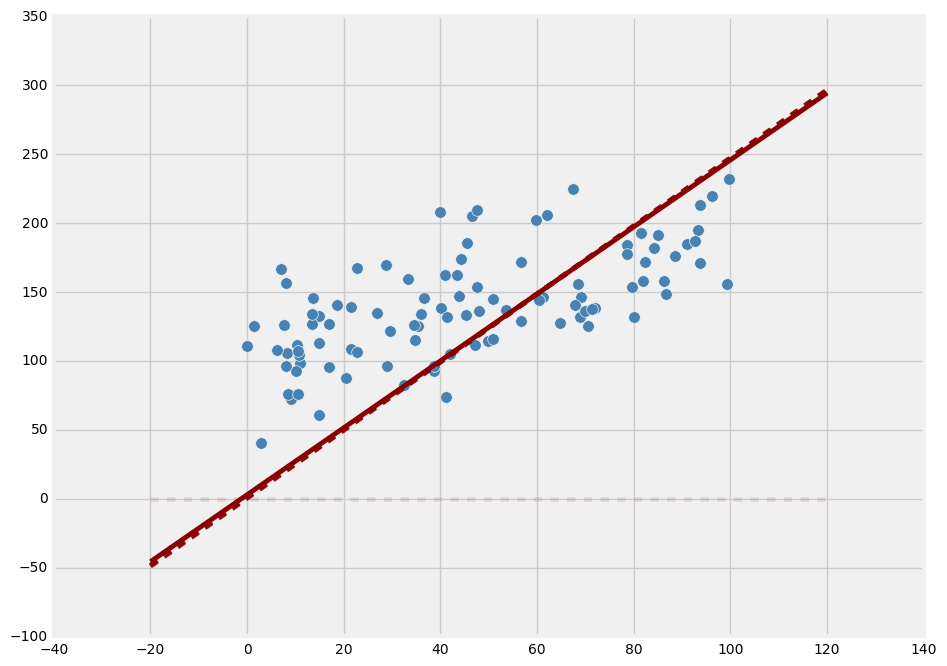

In [10]:
plt.figure(figsize=(10,8))
axes = plt.gca()
plt.scatter(x, y, s=70, c='steelblue')

x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
# plt.plot(x_points, x_points*beta1s[0] + beta0s[0], c='darkred', lw=3.5, ls='dashed', alpha=0.1)
# plt.plot(x_points, x_points*beta1s[25] + beta0s[25], c='darkred', lw=3.5, ls='dashed', alpha=0.2)
# plt.plot(x_points, x_points*beta1s[50] + beta0s[50], c='darkred', lw=3.5, ls='dashed', alpha=0.3)
# plt.plot(x_points, x_points*beta1s[50] + beta0s[75], c='darkred', lw=3.5, ls='dashed', alpha=0.4)
# plt.plot(x_points, x_points*beta1s[100] + beta0s[100], c='darkred', lw=3.5, ls='dashed', alpha=0.6)
# plt.plot(x_points, x_points*beta1s[150] + beta0s[150], c='darkred', lw=3.5, ls='dashed', alpha=0.8)
# plt.plot(x_points, x_points*beta1s[-1] + beta0s[-1], c='darkred', lw=3.5, alpha=1.0)

plt.show()

> Check: please re-explain this demonstration to your neighbor! 

## 7.  Gradient descent can fail

One of the most fickle things about gradient descent is the step size (also known as learning rate). If this is not tuned properly, the algorithm may never converge and in fact explode into extreme values.

Gradient descent also only works where there is a gradient to follow. Here is a toy example of a function where gradient descent will fail:

$$f(x, y) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

Gradient descent code for the function:

In [13]:
def func(x):
    if x <= 1:
        return 2 * x * x
    return 2

def gradient(x):
    if x <= 1:
        return 4 * x
    return 0

def gradient_descent(x, l=0.1):
    vector = np.array(x)
    return vector - l * np.array(gradient(x))


def iterate(x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        x = gradient_descent(xs[-1], l=0.001)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

Run the gradient descent algorithm starting at **x = -1.5** first, then try it at **x = 2**:

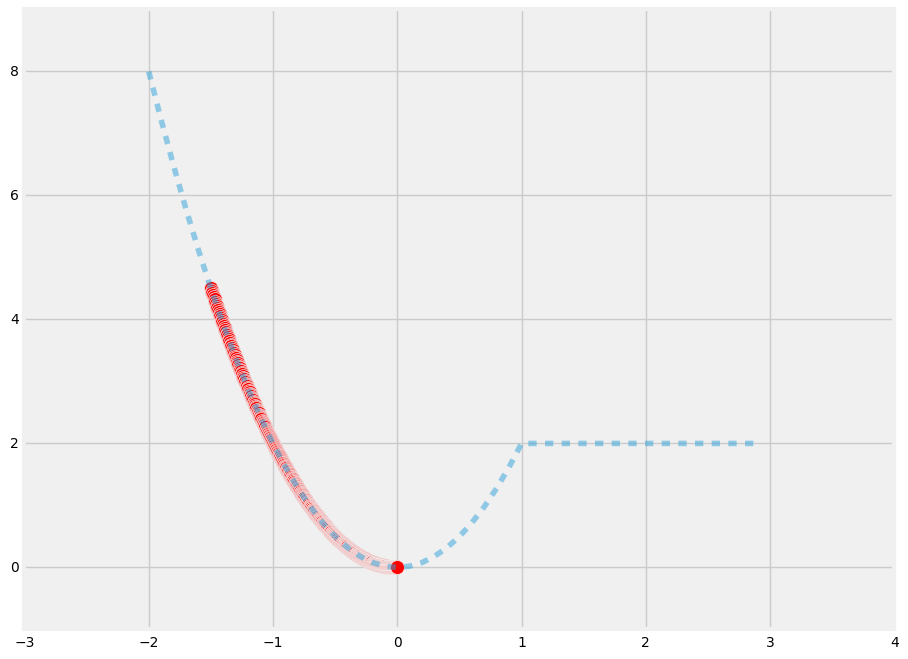

In [15]:
xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

plt.figure(figsize=(10,8))
plt.plot(xs, ys, alpha=0.5, ls='dashed')

# Start gradient descent at x = -1.5
xs2, ys2 = iterate(-1.5, n=10000)
plt.scatter(xs2, ys2, c='r', s=100)

# Start gradient descent at x = 2; where does it go?
#xs2, ys2 = iterate(2, n=10)
#plt.scatter(xs2, ys2, c='y', s=300)

# Supplementary resources

On derivatives - https://www.khanacademy.org/math/calculus-home/differential-calculus/taking-derivatives

On gradients - http://ocw.mit.edu/courses/mathematics/18-02sc-multivariable-calculus-fall-2010/2.-partial-derivatives/part-b-chain-rule-gradient-and-directional-derivatives/session-35-gradient-definition-perpendicular-to-level-curves/

On gradient descent - https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/